# Human Disease Ontology
---
### Data for this analysis comes from Wormbase

https://wormbase.org/tools/ontology_browser/

![Image](./input_data/Wormbase-screenshot.png)

--- 
### Summary of findings


* 3.0% of __Unassigned Genes__ are related to Human Disease.
* 6.0% of __Poorly Annotated Genes__ are related to Human Disease.
* 11.0% of __All Worm Genes__ are related to Human Disease.


__Notes:__

* We define ___Poorly Annotated Genes (PAG)___ as Genes in Category 1 of WormCat with the descriptions ['Unassigned','Transmembrane protein', 'Transmembrane transport']

In [1]:
import pandas as pd

In [2]:
# Read in the Disease Ontology
# The data has comes from Wormbase
xlsx_file_nm = './input_data/Human_Disease_Ontology.xlsx'
human_disease_xlsx = pd.ExcelFile(xlsx_file_nm)

In [3]:
# Lets take a look at the sheets that are in this Excel
sheet_names = human_disease_xlsx.sheet_names
sheet_names

['infectious agent',
 'genetic disease',
 'physical disorder',
 'syndrome',
 'cellular proliferation',
 'disease of mental health',
 'disease of metabolism',
 'anatomical entity']

In [4]:
# Create a dictionary of each human disease with the aligned Wormbase_ids
human_disease_dfs = {}
for sheet_name in sheet_names:
    human_disease_dfs[sheet_name] =                                 
    human_disease_dfs[sheet_name] = human_disease_dfs[sheet_name].rename(columns={'disease_type': sheet_name})
    human_disease_dfs[sheet_name][sheet_name]=True
    human_disease_dfs[sheet_name] = human_disease_dfs[sheet_name].drop(columns=['DOID', 'descendant terms'])
    


In [5]:
#human_disease_dfs

In [6]:
# merge the individual dataframes of disease into a single dataframe
merged_df = pd.merge(human_disease_dfs[sheet_names[0]], human_disease_dfs[sheet_names[1]], on='wormbase_id', how='outer')
print(sheet_names[0])
print(sheet_names[1])
for index in range(2,len(sheet_names)):
    print(sheet_names[index])
    merged_df = pd.merge(merged_df, human_disease_dfs[sheet_names[index]], on='wormbase_id', how='outer')
    
len(merged_df)

infectious agent
genetic disease
physical disorder
syndrome
cellular proliferation
disease of mental health
disease of metabolism
anatomical entity


3339

In [7]:
merged_df = merged_df.rename(columns={'wormbase_id':'wormbase_id_disease'})
merged_df

,wormbase_id_disease,infectious agent,genetic disease,physical disorder,syndrome,cellular proliferation,disease of mental health,disease of metabolism,anatomical entity
0,WBGene00000035,True,True,NaN,NaN,NaN,True,True,True
1,WBGene00000036,True,True,NaN,NaN,NaN,True,True,True
2,WBGene00000037,True,True,NaN,NaN,NaN,True,True,True
3,WBGene00000038,True,True,NaN,NaN,NaN,True,True,True
4,WBGene00000039,True,True,NaN,NaN,True,True,True,True
...,...,...,...,...,...,...,...,...,...
3334,WBGene00023451,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3335,WBGene00043097,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3336,WBGene00044621,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3337,WBGene00044738,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [8]:
# Load the wormbase category list
wormcat_df = pd.read_csv('./input_data/whole_genome_v2_nov-11-2021.csv') 
wormcat_df = wormcat_df.rename(columns={'Sequence ID':'sequence_id','Wormbase ID':'wormbase_id','Category 1':'category_1','Category 2':'category_2','Category 3':'category_3'})
wormcat_df.columns

Index(['sequence_id', 'wormbase_id', 'category_1', 'category_2', 'category_3',
       'Automated Description'],
      dtype='object')

In [9]:
# Select the Unassigned Genes
unassigned = wormcat_df.query("category_1 == 'Unassigned'")['wormbase_id']
unassigned_df = unassigned.to_frame()
print(f"We have {len(unassigned_df):,} unassigned genes.")

We have 6,343 unassigned genes.


In [10]:
unassigned_merged_df = pd.merge(unassigned_df, merged_df, left_on='wormbase_id', right_on='wormbase_id_disease', how='left')
unassigned_merged_df


,wormbase_id,wormbase_id_disease,infectious agent,genetic disease,physical disorder,syndrome,cellular proliferation,disease of mental health,disease of metabolism,anatomical entity
0,WBGene00000029,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WBGene00000030,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WBGene00000031,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,WBGene00000032,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WBGene00043988,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
6338,WBGene00018979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6339,WBGene00050896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6340,WBGene00050892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6341,WBGene00018978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
unassigned_diseased = unassigned_merged_df[~unassigned_merged_df.wormbase_id_disease.isnull()]
unassigned_diseased

,wormbase_id,wormbase_id_disease,infectious agent,genetic disease,physical disorder,syndrome,cellular proliferation,disease of mental health,disease of metabolism,anatomical entity
11,WBGene00044440,WBGene00044440,NaN,NaN,NaN,NaN,NaN,NaN,True,NaN
12,WBGene00018304,WBGene00018304,NaN,True,True,NaN,NaN,NaN,NaN,True
16,WBGene00016966,WBGene00016966,NaN,True,True,NaN,True,NaN,NaN,True
18,WBGene00012835,WBGene00012835,NaN,True,NaN,NaN,NaN,NaN,NaN,True
21,WBGene00007100,WBGene00007100,NaN,NaN,NaN,NaN,True,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...
6015,WBGene00270321,WBGene00270321,NaN,True,True,NaN,NaN,NaN,NaN,True
6029,WBGene00012782,WBGene00012782,NaN,True,True,NaN,True,NaN,True,True
6119,WBGene00013156,WBGene00013156,NaN,NaN,NaN,NaN,True,NaN,NaN,True
6127,WBGene00021877,WBGene00021877,NaN,True,NaN,NaN,NaN,NaN,NaN,True


In [12]:
# Lets get the poorly annotated genes
#Unassigned, transmembrane protein and transmembrane transporter
pag_series = wormcat_df.query("category_1 in ['Unassigned','Transmembrane protein', 'Transmembrane transport']")['wormbase_id']
pag_df = pag_series.to_frame()
print(f"We have {len(pag_df):,} PAG's.")

We have 10,444 PAG's.


In [13]:
pag_merged_df = pd.merge(pag_series, merged_df, left_on='wormbase_id', right_on='wormbase_id_disease', how='left')
pag_merged_df

,wormbase_id,wormbase_id_disease,infectious agent,genetic disease,physical disorder,syndrome,cellular proliferation,disease of mental health,disease of metabolism,anatomical entity
0,WBGene00016439,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WBGene00008148,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,WBGene00008624,WBGene00008624,NaN,NaN,True,NaN,NaN,NaN,NaN,True
3,WBGene00017053,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,WBGene00017065,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
10439,WBGene00018979,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10440,WBGene00050896,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10441,WBGene00050892,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
10442,WBGene00018978,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [14]:
pag_diseased = pag_merged_df[~pag_merged_df.wormbase_id_disease.isnull()]
pag_diseased

,wormbase_id,wormbase_id_disease,infectious agent,genetic disease,physical disorder,syndrome,cellular proliferation,disease of mental health,disease of metabolism,anatomical entity
2,WBGene00008624,WBGene00008624,NaN,NaN,True,NaN,NaN,NaN,NaN,True
13,WBGene00017289,WBGene00017289,NaN,True,True,NaN,NaN,NaN,True,NaN
20,WBGene00021945,WBGene00021945,NaN,True,True,NaN,NaN,NaN,NaN,True
22,WBGene00021888,WBGene00021888,NaN,NaN,NaN,NaN,True,NaN,NaN,True
25,WBGene00011040,WBGene00011040,NaN,True,NaN,NaN,NaN,NaN,NaN,True
...,...,...,...,...,...,...,...,...,...,...
10116,WBGene00270321,WBGene00270321,NaN,True,True,NaN,NaN,NaN,NaN,True
10130,WBGene00012782,WBGene00012782,NaN,True,True,NaN,True,NaN,True,True
10220,WBGene00013156,WBGene00013156,NaN,NaN,NaN,NaN,True,NaN,NaN,True
10228,WBGene00021877,WBGene00021877,NaN,True,NaN,NaN,NaN,NaN,NaN,True


## Create Visualizations

In [15]:
import matplotlib.pyplot as plt
import numpy as np

def get_data_dict(merged_df):
    print(f' Disease{"":<21} Count')
    print('-'*40)
    data = {}
    for sheet_name in sheet_names:
        data[sheet_name]=list(merged_df[sheet_name].value_counts())[0]
        print(f" {sheet_name:<30} {data[sheet_name]:>6,}")
    return data

def create_plot_disease_ontology(data, y_title):
    sorted_dict = dict(sorted(data.items(), key=lambda x: x[1]*-1))
    x = sorted_dict.keys()
    y = sorted_dict.values()

    fig, ax = plt.subplots(figsize=(10, 5))
    # Create bar plot
    plt.bar(x, y)

    # Set title and labels
    plt.title(f"Human Disease Ontology",fontsize=15)
    plt.ylabel(y_title)
    plt.xlabel("Human Disease")
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    # Show plot
    plt.show()


In [16]:
print(f"{round(len(unassigned_merged_df[unassigned_merged_df['wormbase_id_disease'].notnull()])/len(unassigned_merged_df),2)*100}% of Unassigned Genes are related to Human Disease.")
print(f"{round(len(pag_merged_df[pag_merged_df['wormbase_id_disease'].notnull()])/len(pag_merged_df),2)*100}% of Poorly Annotated Genes are related to Human Disease.")

wormcat_merged_df = pd.merge(wormcat_df, merged_df, left_on='wormbase_id', right_on='wormbase_id_disease', how='left')
print(f"{round(len(wormcat_merged_df[wormcat_merged_df['wormbase_id_disease'].notnull()])/len(wormcat_merged_df),2)*100}% of All Worm Genes are related to Human Disease.")

3.0% of Unassigned Genes are related to Human Disease.
6.0% of Poorly Annotated Genes are related to Human Disease.
11.0% of All Worm Genes are related to Human Disease.


 Disease                      Count
----------------------------------------
 infectious agent                    5
 genetic disease                   133
 physical disorder                  16
 syndrome                           37
 cellular proliferation             48
 disease of mental health           19
 disease of metabolism              25
 anatomical entity                 143


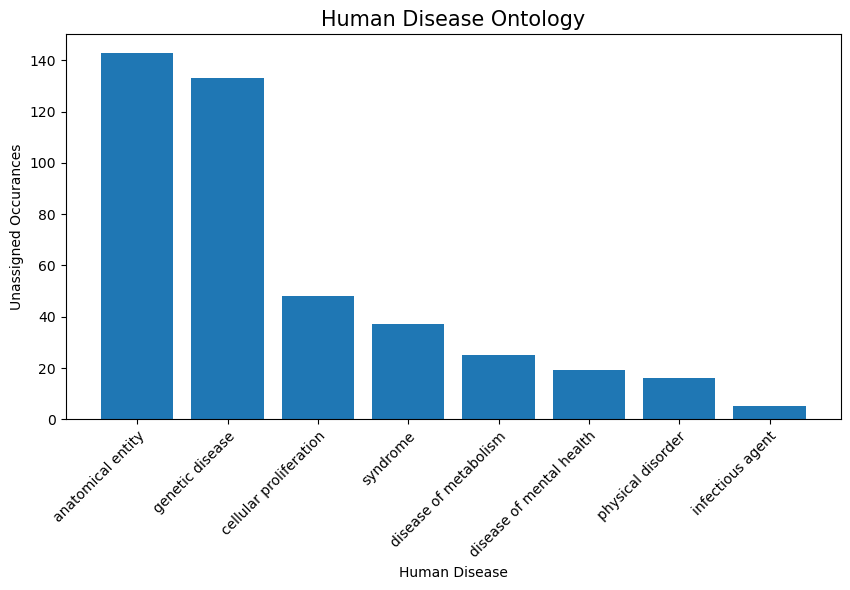

In [17]:
data = get_data_dict(unassigned_merged_df)    
create_plot_disease_ontology(data, "Unassigned Occurances")    

 Disease                      Count
----------------------------------------
 infectious agent                  200
 genetic disease                 2,318
 physical disorder                 442
 syndrome                          569
 cellular proliferation          1,095
 disease of mental health          482
 disease of metabolism             892
 anatomical entity               2,653


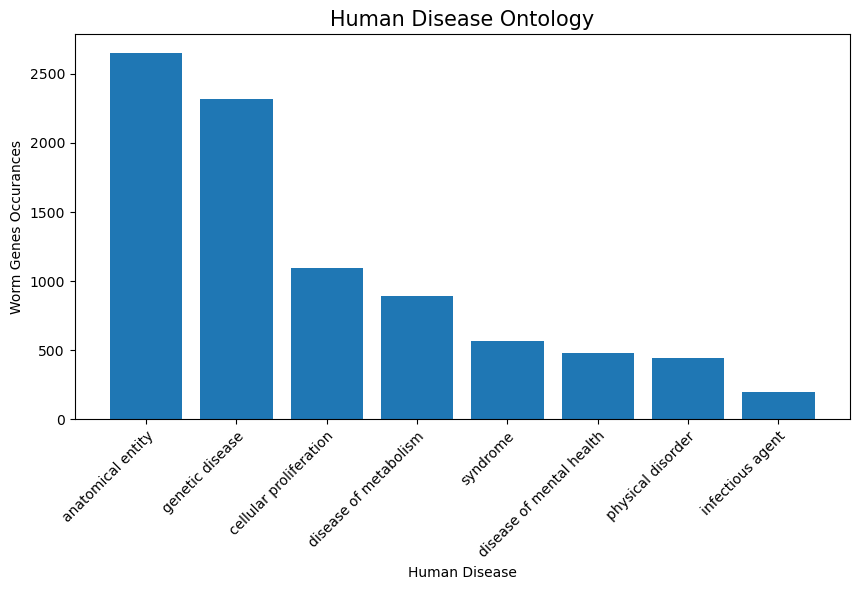

In [18]:
data = get_data_dict(wormcat_merged_df)    
create_plot_disease_ontology(data, "Worm Genes Occurances")    

 Disease                      Count
----------------------------------------
 infectious agent                   29
 genetic disease                   456
 physical disorder                  82
 syndrome                           86
 cellular proliferation            151
 disease of mental health           83
 disease of metabolism             140
 anatomical entity                 488


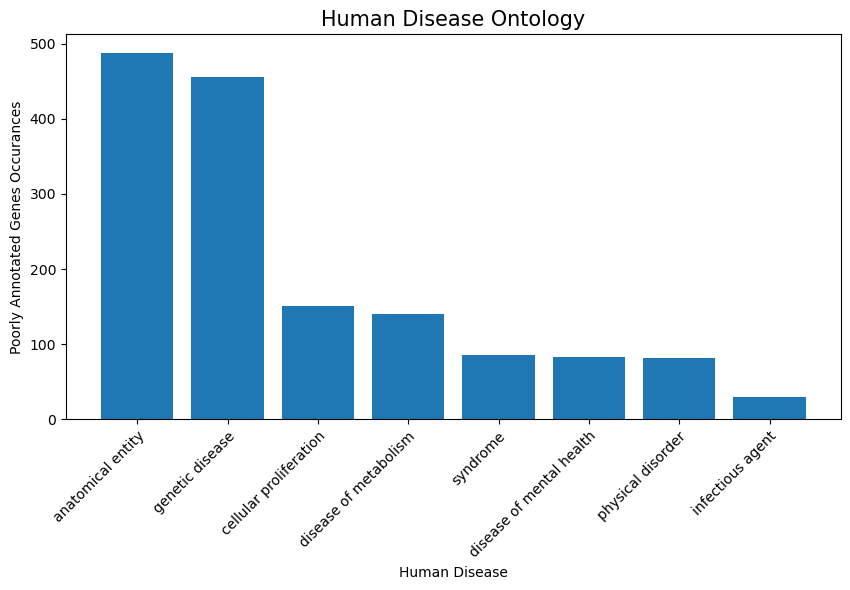

In [19]:
data = get_data_dict(pag_merged_df)    
create_plot_disease_ontology(data, "Poorly Annotated Genes Occurances")  

# Appendix

Utility functions

In [ ]:
%%bash
echo "Start image resize"

# Replace file name with the name of file to be resized
file_dir='./input_data'
file_nm='Wormbase-screenshot.png'
full_path=`echo ${file_dir}/${file_nm}`
echo ${full_path}

pic_size=`identify -format "%[fx:w]x%[fx:h]" ${full_path}`
echo $pic_size

if [[ "${pic_size}" == "936x544" ]]; then
    echo image ${pic_size} resized
    full_tmp_path=`echo ${file_dir}/tmp_${file_nm}`
    echo convert ${full_path} -resize 40% ${full_tmp_path}
    echo mv ${full_tmp_path} ${file_nm}
else
    echo image already resized ${pic_size}
fi

In [ ]:
!convert ./input_data/Wormbase-screenshot.png -resize 50% ./input_data/tmp_Wormbase-screenshot.png


# Appendix

In [1]:
# Convert Microsoft Documents to pdf for easy reading in Jupyter
#!libreoffice --convert-to pdf "./Analysis/Graphics_for_Assignment1.pptx"
!libreoffice --convert-to pdf "./admin_sup2.docx"

convert /media/data1/Code/Notebooks/UMass_Med/WormCat/admin_sup2.docx -> /media/data1/Code/Notebooks/UMass_Med/WormCat/admin_sup2.pdf using filter : writer_pdf_Export
